In [26]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

### Setup from Thinkful

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv", header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

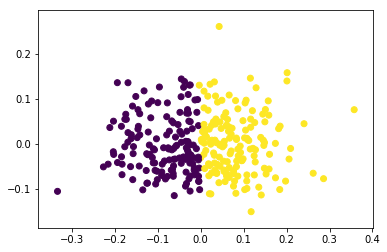

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [3]:
# Normalize the data.
X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

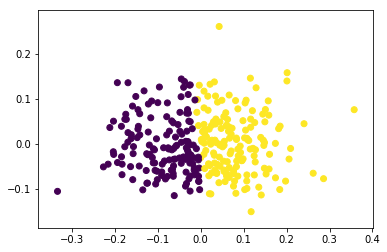

Comparing mini batch k-means solutions to the data:
col_0   0    1
row_0         
0      83   63
1      56  101


In [14]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=100)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict_mini)
plt.show()

# Check the MiniBatch model to the data.
print('Comparing mini batch k-means solutions to the data:')
print(pd.crosstab(predict_mini, y))

In [5]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predict_mini, y)

array([[29, 72,  0],
       [64, 61,  0],
       [46, 31,  0]])

## Drill: More clusters?

Your task is to take the $k$-means code here and see what happens when you change the value of $k$.  What solution, if any, do you find most compelling? Does complexity start to become an issue with this data set? Play around a bit and write up your findings and your process to share with your mentor.  Keep in mind that it may be possible to have a solution with more than two clusters that is still better at tracking the real binary outcome – two of those clusters may map to "heart disease" while the other maps to "no heart disease," for example.

### I'll use the elbow method to determine the optimal K.
* For each K to be tested, operationalize distortion as the mean of the distances from from the nearest centroid for each observation.
* Plot K and distortion.
* The plot's 'elbow' is the optimal K.

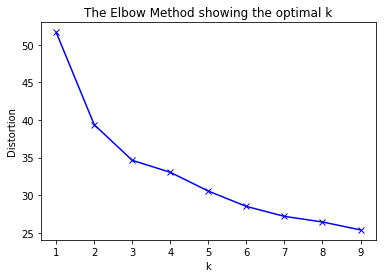

In [11]:
from scipy.spatial.distance import cdist

# Calculate 
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### It looks like 2 is the optimal number of clusters. I'll verify with silhouette scores.
* The Silhouette Coefficient for a sample is (b - a) / max(a, b).
* The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [73]:
for k_value in range(2,10):
    model = KMeans(n_clusters=k_value, random_state=42)
    y_pred = model.fit_predict(X_pca)
    label = model.labels_
    silh_score = round(silhouette_score(X_pca, 
                                        label, 
                                        metric='euclidean'),3)
    
    print('The silhouette score for k = {} is {}'.format(k_value, silh_score))

The silhouette score for k = 2 is 0.391
The silhouette score for k = 3 is 0.316
The silhouette score for k = 4 is 0.348
The silhouette score for k = 5 is 0.351
The silhouette score for k = 6 is 0.333
The silhouette score for k = 7 is 0.331
The silhouette score for k = 8 is 0.345
The silhouette score for k = 9 is 0.343


### This confirms the elbow method's suggestion – k = 2 has the highest silhouette coefficient.

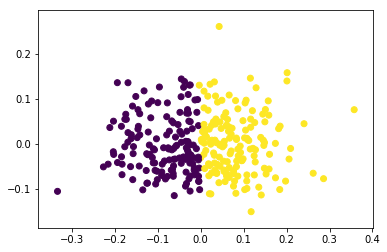

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [74]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, 
                random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

### Complexity is an issue with larger K values with regard to binary classification problems. "Clusters A, B, C, and F indicate true, while clusters D, E, and G indicate false" feels very unwieldy, especially given the many other classification methods available to me.